In [1]:
import os, cv2, glob
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import pyramid_reduce 
plt.style.use('dark_background')

In [2]:
# 다운받은 dataset 디렉토리 경로 넣어주기
# 자신의 환경에 맞도록 base_path 변경하기 (중요)
base_path = 'E:\celeba-dataset'

img_base_path = os.path.join(base_path, 'img_align_celeba/img_align_celeba')
target_img_path = os.path.join(base_path, 'processed')

# 폴더 없으면 target_img_path에 생성
if not os.path.isdir(target_img_path):
    print(target_img_path +" 생성")
    os.mkdir(target_img_path)

## PATH 연결 확인

In [4]:
print(base_path)
print(img_base_path)

E:\celeba-dataset
E:\celeba-dataset\img_align_celeba/img_align_celeba


In [5]:
'''
list_eval_partition.csv의 두번째 열
0 : train-set
1 : validation-set
2 : test-set
'''
list_eval_partition_path = os.path.join(base_path, 'list_eval_partition.csv')
eval_list = np.loadtxt(list_eval_partition_path, dtype=str, delimiter=',', skiprows=1)



eval_list[0]


array(['000001.jpg', '0'], dtype='<U10')

## 이미지 전처리 테스트

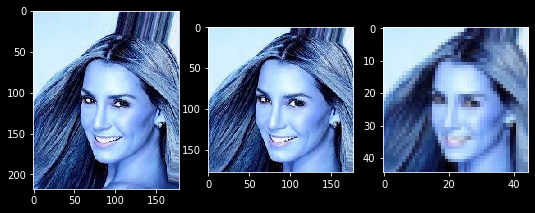

In [6]:
# opencv를 사용해 이미지 불러오기
img_sample = cv2.imread(os.path.join(img_base_path, eval_list[0][0]))

h, w, _ = img_sample.shape

# 세로로 긴 이미지를 정사각형으로 줄이기
crop_sample = img_sample[int((h-w)/2):int(-(h-w)/2), :]

# 정사각형 이미지의 해상도를 1/4 로 줄이기
resized_sample = pyramid_reduce(crop_sample, downscale=4,  multichannel=True)

# 이미지 출력하기
plt.figure(figsize=(12, 5))
plt.subplot(1, 4, 1)
plt.imshow(img_sample)
plt.subplot(1, 4, 2)
plt.imshow(crop_sample)
plt.subplot(1, 4, 3)
plt.imshow(resized_sample)

## 이미지 전처리 실행

In [ ]:
'''
downscale : downscale 만큼 이미지 줄이기
n_train   : train set 개수 162770
n_val     : validation set 개수 19867
n_test    : test set 개수 19962
'''
downscale = 4
n_train = 162770
n_val = 19867
n_test = 19962

#eval_list에서 파일 이름과 어떤 종류의 데이터셋인지 받아오기
for i, e in enumerate(eval_list):
    # filename 
    filename, ext = os.path.splitext(e[0])
    print(filename)
    img_path = os.path.join(img_base_path, e[0])
    
    img = cv2.imread(img_path)
    
    h, w, _ = img.shape
    
    # 받아온 이미지를 정사각형으로 만들고 (176,176,3)으로 resize 한다
    # (176,176,3)에서 3은 컬러 이미지 RGB 3채널을 의미한다.
    # 176으로 하는 이유는 모든 이미지의 크기를 동일하게 맞춰주기 위함 (꼭 176일 필요는 없음)
    crop = img[int((h-w)/2):int(-(h-w)/2), :]
    crop = cv2.resize(crop, dsize=(176, 176))
    
    # 이미지를 downscale(=4) 만큼 줄여주기 (자동으로 normalize 됨)
    resized = pyramid_reduce(crop, downscale=downscale, multichannel=True)

    # 원본 이미지를 normalize 함
    norm = cv2.normalize(crop.astype(np.float64), None, 0, 1, cv2.NORM_MINMAX)

    # x_train set을 전처리하여 저장할 디렉토리 경로를 맞춰준다
    x_train_target_img_path = os.path.join(target_img_path, 'x_train')
    # "x_train"이라는 디렉토리가 없으면 생성한다
    if not os.path.isdir(x_train_target_img_path):
        print(x_train_target_img_path +" 생성")
        os.mkdir(x_train_target_img_path)
    
    # 위와 동일
    y_train_target_img_path = os.path.join(target_img_path, 'y_train')
    if not os.path.isdir(y_train_target_img_path):
        print(y_train_target_img_path +" 생성")
        os.mkdir(y_train_target_img_path)

    x_val_target_img_path = os.path.join(target_img_path, 'x_val')
    if not os.path.isdir(x_val_target_img_path):
        print(x_val_target_img_path +" 생성")
        os.mkdir(x_val_target_img_path)

    y_val_target_img_path = os.path.join(target_img_path, 'y_val')
    if not os.path.isdir(y_val_target_img_path):
        print(y_val_target_img_path +" 생성")
        os.mkdir(y_val_target_img_path)

    x_test_target_img_path = os.path.join(target_img_path, 'x_test')
    if not os.path.isdir(x_test_target_img_path):
        print(x_test_target_img_path +" 생성")
        os.mkdir(x_test_target_img_path)

    y_test_target_img_path = os.path.join(target_img_path, 'y_test')
    if not os.path.isdir(y_test_target_img_path):
        print(y_test_target_img_path +" 생성")
        os.mkdir(y_test_target_img_path)
        
    # Train set 일 때
    # 파일 저장
    if int(e[1]) == 0:
        x_train_file_path = os.path.join(target_img_path, 'x_train', filename + '.npy')
        y_train_file_path = os.path.join(target_img_path, 'y_train', filename + '.npy')
        if not os.path.isfile(x_train_file_path):
            np.save(x_train_file_path, resized)
        if not os.path.isfile(y_train_file_path):
            np.save(y_train_file_path, norm)

    # validation set일 때
    # 파일 저장
    elif int(e[1]) == 1:
        x_val_file_path = os.path.join(target_img_path, 'x_val', filename + '.npy')
        y_val_file_path = os.path.join(target_img_path, 'y_val', filename + '.npy')
        if not os.path.isfile(x_val_file_path):
            np.save(x_val_file_path, resized)
        if not os.path.isfile(y_val_file_path):
            np.save(y_val_file_path, norm)
            
    # Test set일 때
    # 파일 저장
    elif int(e[1]) == 2:
        x_test_file_path = os.path.join(target_img_path, 'x_test', filename + '.npy')
        y_test_file_path = os.path.join(target_img_path, 'y_test', filename + '.npy')
        if not os.path.isfile(x_test_file_path):
            np.save(x_test_file_path, resized)
        if not os.path.isfile(y_test_file_path):
            np.save(y_test_file_path, norm)



000001
000002
000003
000004
000005
